In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
import seaborn as sns

In [2]:
res_data = pd.read_csv(r'runs\detect\PPE_Detection2\results.csv')
res_data.head(3)

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,42.2577,1.80654,1.92147,1.61220,0.68357,0.38610,0.42087,0.19104,1.98202,1.40146,1.84315,0.000219,0.000219,0.000219
1,2,72.5305,1.80600,1.33599,1.58150,0.81169,0.36488,0.43116,0.19331,2.00558,1.44204,1.85287,0.000437,0.000437,0.000437
2,3,108.4940,1.80989,1.37534,1.58406,0.84153,0.33162,0.39299,0.16838,2.07611,1.74422,1.95983,0.000651,0.000651,0.000651


In [3]:
# Define a function to plot learning curves for loss values
def plot_learning_curve(df, train_loss_col, val_loss_col, title):
    
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='#141140', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='orangered', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

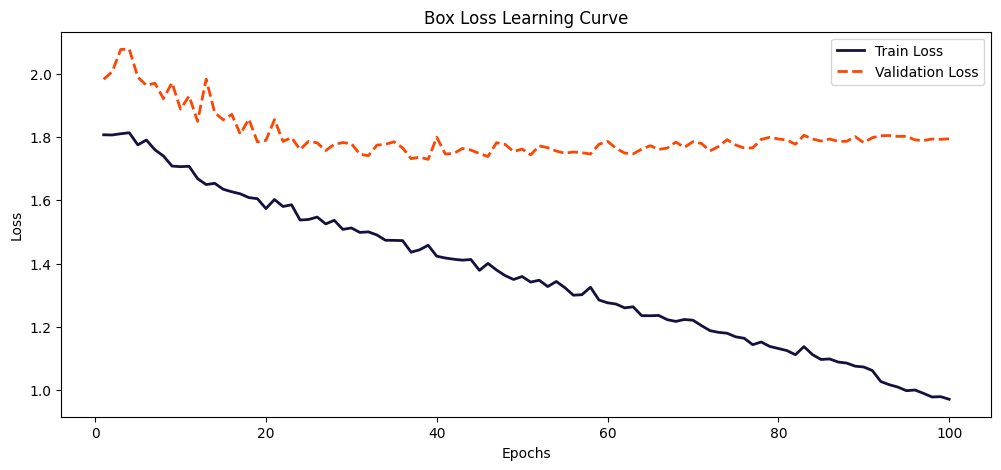

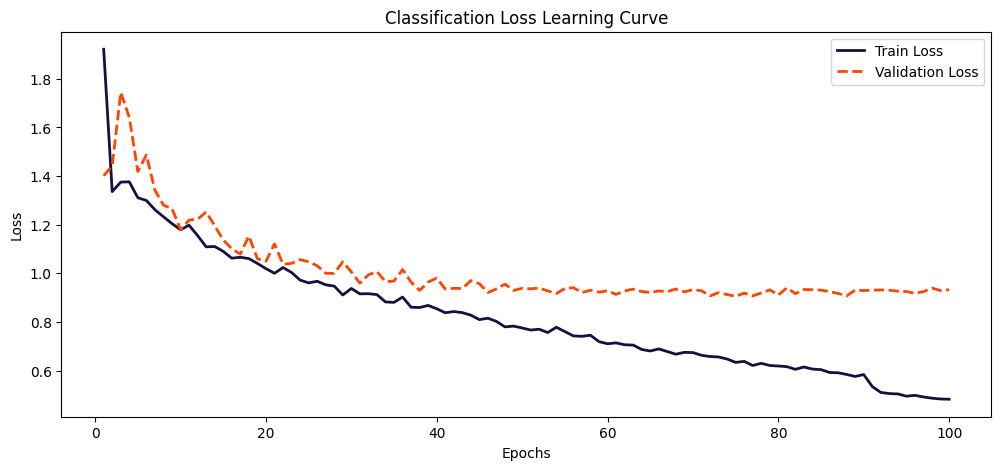

In [4]:
# Remove any leading whitespace from the column names
res_data.columns = res_data.columns.str.strip()

# Plot the learning curves for each loss
plot_learning_curve(res_data, 'train/box_loss', 'val/box_loss', 'Box Loss Learning Curve')
plot_learning_curve(res_data, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')